In [1]:
import json
from pprint import pprint
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def convertToTime(t):
    index = t.find('+0000')
    lst = t.split('+0000')
    t = ''
    for l in lst:
        t = t + l
    return t

In [3]:
def yield_times(hst,mst):
    from datetime import date, time, datetime, timedelta
    start = datetime.combine(date.today(), time(hst, mst))
    yield start.strftime("%H:%M")
    while True:
        start += timedelta(seconds=600)
        yield start.strftime("%H:%M")

In [4]:
def generateTimeGap():
    gen = yield_times(9,30)
    t_seq = []
    for i in range(40):
        t_seq.append(gen.next())

    return t_seq

t_gap = generateTimeGap()

In [5]:
def formatTime(hour,minute):
    m = ''
    if hour < 10: 
        m = m + "0" + str(hour) + ":"
    else: 
        m = m + str(hour) + ":"
    if minute < 10:
        m = m + "0" + str(minute)
    else:
        m = m + str(minute)
    return m

In [6]:
# def groupTweetsByTime(fileName, t_gap):
#     f = open(fileName, 'r')
    
#     mydict = {}
#     i = 0
#     lst = []
#     for line in f:
#         if line.find('created_at') > 0:# filter the deleted tweets
#             tweet = json.loads(line)
#             t = time.strptime(convertToTime(tweet['created_at'])) # convert tweet time to HH:MM format 
#             t1 = formatTime(t.tm_hour, t.tm_min)# get time in format: HH:MM
#             tweet['time'] = t1
#             if t < t_gap[i]:
#                 lst.append(tweet)
#             else:
#                 mydict[t_gap[i]] = lst
#                 lst = [tweet]
#                 if i == len(t_gap)-1:
#                     break
#                 else:
#                     i += 1
#     f.close()
#     return mydict

In [8]:
# test group the tweets by time
# def generateTimeSeq():
#     lst = []
#     for i in xrange(9,15):
#         for j in xrange(0, 59):
#             m = ''
#             if i < 10: 
#                 m = m + "0" + str(i) + ":"
#             else: 
#                 m = m + str(i) + ":"
#             if j < 10:
#                 m = m + "0" + str(j)
#             else:
#                 m = m + str(j)
#             lst.append(m)
#     return lst


# my_seq = generateTimeSeq()

# mydict = {}
# i = 0
# lst = []
# for t in my_seq:
#     if t < t_gap[i]:
#         lst.append(t)
#     else:
#         mydict[t_gap[i]] = lst
#         lst = [t]
#         i += 1
# import pandas as pd

# p = pd.DataFrame(mydict.items())
# p.sort_values(0)


In [9]:
# from yahoo_finance import Share
# import time

# for i in xrange(5):
#     GSPC = Share("^GSPC")
#     IXIC = Share('^IXIC')
#     start = time.time()
#     price_dict = {}
#     GSPC.refresh()
#     IXIC.refresh()
#     price_dict["time"] = time.ctime()
#     price_dict["SP500"] = float(GSPC.get_price())
#     price_dict["nasdaq"] = float(IXIC.get_price())
#     print price_dict
#     end = time.time()
# #     print end - start
#     time.sleep(3)

In [6]:
f = open('data/day2/output2.json', 'r')
i = 0
for line in f:
    if line.find('created_at') > 0:
        i += 1
print i
f.close()

1138035


In [93]:
len(t_gap)

40

In [95]:
1138035/40

28450

In [6]:
def parseFinance(fileName, t_gap):
    f = open(fileName, 'r')

    sp500 = {}
    nasdaq = {}
    start = t_gap[0]
    end = t_gap[1]
    cursor = 0

    for line in f:
        if line.find('nasdaq') > 0:
            fjson = json.loads(line)
            t = time.strptime(convertToTime(fjson['time']))
            t = formatTime(t.tm_hour,t.tm_min)# get time in format: HH:MM
            fjson['time'] = t
            if t <= start:
                sp500[end] = fjson['SP500']
                nasdaq[end] = fjson['nasdaq']
                continue
            if t > start and t <= end:
                sp500[end] = fjson['SP500']
                nasdaq[end] = fjson['nasdaq']
                continue
            if t > end:
                for j in xrange(cursor, len(t_gap)):
                    if t > t_gap[j]:
                        continue
                    else:
                        cursor = j
                        start = t_gap[j-1]
                        end = t_gap[j]
                        sp500[end] = fjson['SP500']
                        nasdaq[end] = fjson['nasdaq']
                        break

    f.close()

    return sp500, nasdaq

In [7]:
sp500, nasdaq = parseFinance('data/day2/finance2.json', t_gap)

In [8]:
import nltk

In [9]:
from nltk.corpus import stopwords
sw = stopwords.words("english")

In [10]:
FiveMunitesCount = 28400

In [11]:
def groupTweetsByCount(fileName, t_gap): 
    f = open(fileName, 'r')  
    
    i = 0
    count = 0
    lst = []
    mydict = {}
    
    for line in f:
        if line.find('created_at') > 0:
            count += 1
            tweet = json.loads(line)
            lst.append(tweet['text'])
            
            if count == FiveMunitesCount:
                mydict[t_gap[i]] = lst
                i += 1
                lst = []
                count = 0
            elif i == (len(t_gap) -1):
                mydict[t_gap[i]] = lst
                
    f.close()
    return mydict

In [12]:
mydict = groupTweetsByCount('data/day2/output2.json',t_gap)

In [13]:
# f = open('output3.json','r')
# lst = []
# for line in f:
#     if line.find('created_at') > 0:
#         tweet = json.loads(line)
#         lst.append(tweet['text'])
# f.close()
# words = [ w for t in lst 
#               for w in t.split() ]
# cleaned_words = [item.lower() for item in words if item not in sw]

# mypd = pd.DataFrame(cleaned_words)
# mypd.columns = ['word']

# merged_positive = pd.merge(left=positives, right=mypd, how='right', on='word')
# print(merged_positive.head())
# merged_negative = pd.merge(left=negatives, right=mypd, how='right', on='word')
# print(merged_negative.head())
len(mydict)

40

In [14]:
# split to the words and remove the stopwords
for key in mydict.keys():
    words = [ w for t in mydict[key] 
              for w in t.split() ]
    cleaned_words = [item.lower() for item in words if item not in sw]
    mydict[key] = cleaned_words


In [15]:
positives = pd.read_csv('positives.csv')
negatives = pd.read_csv('negatives.csv')

In [16]:
ratios = {}
diffs = {}
for key in mydict.keys():
    mypd = pd.DataFrame(mydict[key])
    mypd.columns = ['word']
    merged_positive = pd.merge(left=positives, right=mypd, how='right', on='word')
    merged_negative = pd.merge(left=negatives, right=mypd, how='right', on='word')
    merged_positive['value'].fillna(0, inplace=True)
    merged_negative['value'].fillna(0, inplace=True)
    pn_ratio = sum(merged_positive['value'])/abs(sum(merged_negative['value']))
    ratios[key] = pn_ratio
    diffs[key] = sum(merged_positive['value']) - abs(sum(merged_negative['value']))

/Users/wangqian/anaconda/lib/python2.7/site-packages/pandas/tools/merge.py:679: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


In [17]:
pd_ratios = pd.DataFrame(ratios.items(), columns=['time', 'value'])
pd_diffs = pd.DataFrame(diffs.items(), columns=['time', 'value'])
pd_nasdaq = pd.DataFrame(nasdaq.items(), columns=['time', 'index'])
pd_sp500 = pd.DataFrame(sp500.items(), columns=['time', 'index'])

merge1 = pd.merge(left=pd_ratios, right=pd_nasdaq, how='inner', on='time').sort_values('time')
merge2 = pd.merge(left=pd_ratios, right=pd_sp500, how='inner', on='time').sort_values('time')
merge3 = pd.merge(left=pd_diffs, right=pd_nasdaq, how='inner', on='time').sort_values('time')
merge4 = pd.merge(left=pd_diffs, right=pd_sp500, how='inner', on='time').sort_values('time')


In [23]:
merge1.to_csv('data/day2/day2_merge1.csv')
merge2.to_csv('data/day2/day2_merge2.csv')
merge3.to_csv('data/day2/day2_merge3.csv')
merge4.to_csv('data/day2/day2_merge4.csv')

In [18]:
import statsmodels.tsa.stattools

In [19]:
test1 = statsmodels.tsa.stattools.grangercausalitytests(merge1[['value','index']], 5)



Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=0.1736  , p=0.6795  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=0.1884  , p=0.6642  , df=1
likelihood ratio test: chi2=0.1880  , p=0.6646  , df=1
parameter F test:         F=0.1736  , p=0.6795  , df_denom=35, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=1.0919  , p=0.3477  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=2.5251  , p=0.2829  , df=2
likelihood ratio test: chi2=2.4427  , p=0.2948  , df=2
parameter F test:         F=1.0919  , p=0.3477  , df_denom=32, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=1.1716  , p=0.3376  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=4.3631  , p=0.2248  , df=3
likelihood ratio test: chi2=4.1183  , p=0.2490  , df=3
parameter F test:         F=1.1716  , p=0.3376  , df_denom=29, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:         F=1.2445

In [107]:
test2 = statsmodels.tsa.stattools.grangercausalitytests(merge2[['value','index']], 5)


Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=0.5339  , p=0.4698  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=0.5797  , p=0.4464  , df=1
likelihood ratio test: chi2=0.5753  , p=0.4482  , df=1
parameter F test:         F=0.5339  , p=0.4698  , df_denom=35, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=2.0100  , p=0.1506  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=4.6481  , p=0.0979  , df=2
likelihood ratio test: chi2=4.3785  , p=0.1120  , df=2
parameter F test:         F=2.0100  , p=0.1506  , df_denom=32, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=1.8121  , p=0.1670  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=6.7485  , p=0.0804  , df=3
likelihood ratio test: chi2=6.1853  , p=0.1029  , df=3
parameter F test:         F=1.8121  , p=0.1670  , df_denom=29, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:         F=1.9802

In [108]:
test3 = statsmodels.tsa.stattools.grangercausalitytests(merge3[['value','index']], 5)


Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=0.3408  , p=0.5631  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=0.3700  , p=0.5430  , df=1
likelihood ratio test: chi2=0.3682  , p=0.5440  , df=1
parameter F test:         F=0.3408  , p=0.5631  , df_denom=35, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=0.8720  , p=0.4278  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=2.0164  , p=0.3649  , df=2
likelihood ratio test: chi2=1.9634  , p=0.3747  , df=2
parameter F test:         F=0.8720  , p=0.4278  , df_denom=32, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=0.5393  , p=0.6592  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=2.0084  , p=0.5707  , df=3
likelihood ratio test: chi2=1.9543  , p=0.5819  , df=3
parameter F test:         F=0.5393  , p=0.6592  , df_denom=29, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:         F=0.8074

In [109]:
test4 = statsmodels.tsa.stattools.grangercausalitytests(merge4[['value','index']], 5)


Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=0.4072  , p=0.5275  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=0.4421  , p=0.5061  , df=1
likelihood ratio test: chi2=0.4396  , p=0.5073  , df=1
parameter F test:         F=0.4072  , p=0.5275  , df_denom=35, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=1.0062  , p=0.3769  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=2.3268  , p=0.3124  , df=2
likelihood ratio test: chi2=2.2566  , p=0.3236  , df=2
parameter F test:         F=1.0062  , p=0.3769  , df_denom=32, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=1.0088  , p=0.4030  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=3.7569  , p=0.2889  , df=3
likelihood ratio test: chi2=3.5735  , p=0.3113  , df=3
parameter F test:         F=1.0088  , p=0.4030  , df_denom=29, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:         F=1.2869

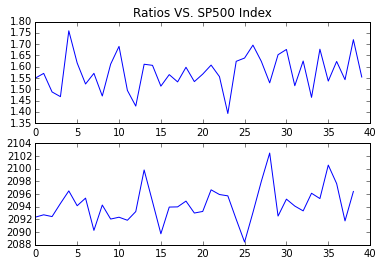

In [112]:
plt.figure(1)

plt.subplot(211)
plt.plot(pd_ratios['value'])
plt.title("Ratios vs. SP500 Index")

plt.subplot(212)
plt.plot(pd_sp500['index'])


plt.show()